In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mplot3d 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy import optimize
%matplotlib inline

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
!git clone https://github.com/ucfilho/ANN

Cloning into 'ANN'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 72 (delta 5), reused 0 (delta 0), pack-reused 54
Unpacking objects: 100% (72/72), done.


In [0]:
%cd ANN

/content/ANN/ANN


In [0]:
# funcao normatiza dados
def Normatiza(x,strings):
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x_M=(max_x+min_x)/2
        x[i]=(x[i]-x_M)/(max_x-x_M)
    return x

In [0]:
# funcao normatiza dados
def Original(x,xcalc,strings):
    k=0
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x_M=(max_x+min_x)/2
        xcalc[k]=xcalc[k]*(max_x-x_M)+x_M
        k=k+1
    return xcalc

In [0]:
#path="/home/ucfilho/Documents/Aulas/ANN_2018/Out_10_2018"
#os.chdir(path)

In [0]:
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
print(DAT.head())

   Time     TC     Y  MI    MW
0  80.0  170.0  76.5  62  2940
1  80.0  180.0  77.0  60  3470
2  90.0  170.0  78.0  66  3680
3  90.0  180.0  79.5  59  3890
4  85.0  175.0  79.9  72  3480


In [0]:
formula='Y ~ Time+TC+I(Time**2.0)+I(TC**2.0)+I(TC*Time)'
#formula='Y ~ Time+TC+I(Time**2.0)+I(TC**2.0)'
est = smf.ols(formula, data=DAT).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     79.67
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           5.15e-06
Time:                        17:02:29   Log-Likelihood:                 2.7787
No. Observations:                  13   AIC:                             6.443
Df Residuals:                       7   BIC:                             9.832
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1430.6884    152.851     -9.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


Text(0.5,0,'z')

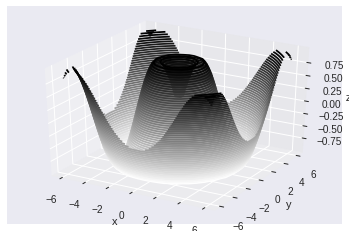

In [0]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30) # o x varia de -6 até 6 e pede para colocar 30 pontos
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

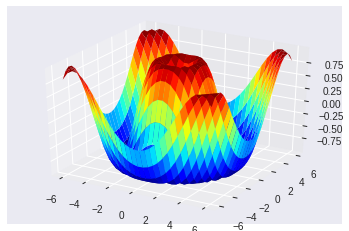

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

In [0]:
strings=['Time','TC']
DAT=Normatiza(DAT,strings)
print(DAT.head())

       Time        TC     Y  MI    MW
0 -0.707214 -0.707214  76.5  62  2940
1 -0.707214  0.707214  77.0  60  3470
2  0.707214 -0.707214  78.0  66  3680
3  0.707214  0.707214  79.5  59  3890
4  0.000000  0.000000  79.9  72  3480


In [0]:
#formula='Y ~ Time+TC+I(Time**2.0)+I(TC**2.0)+I(TC*Time)'
formula='Y ~ Time+TC+I(Time**2.0)+I(TC**2.0)'
est = smf.ols(formula, data=DAT).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     75.02
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           2.23e-06
Time:                        17:02:34   Log-Likelihood:                0.12741
No. Observations:                  13   AIC:                             9.745
Df Residuals:                       8   BIC:                             12.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         79.9400      0.137    585.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


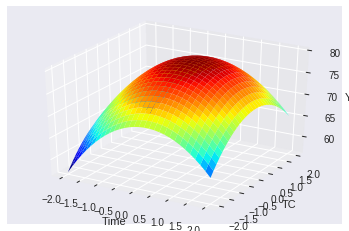

In [0]:
def f(Time, TC):
    return 79.9400+1.4070*Time+0.7285*TC-2.7521*Time**2-2.0021*TC**2

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Y');

In [0]:
#formula='MI ~ Time+TC+I(Time**2.0)+I(TC**2.0)+I(TC*Time)'
#formula='MI ~ TC+I(Time**2.0)+I(TC**2.0)+I(TC*Time)'
#formula='MI ~ I(Time**2.0)+I(TC**2.0)'
#formula='MI ~ I(TC**2.0)+I(TC*Time)'
formula='MI ~ I(TC**2.0)'
est = smf.ols(formula, data=DAT).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     MI   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     63.77
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           6.65e-06
Time:                        17:02:36   Log-Likelihood:                -27.599
No. Observations:                  13   AIC:                             59.20
Df Residuals:                      11   BIC:                             60.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.5222      0.794     87.575   

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


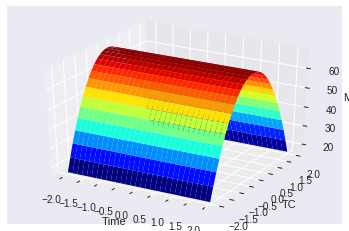

In [0]:
def f(Time, TC):
    return 69.5222-13.1952*TC**2

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MI');

In [0]:
#formula='MW ~ Time+TC+I(Time**2.0)+I(TC**2.0)+I(TC*Time)'
formula='MW ~ Time+TC+I(TC**2.0)+I(TC*Time)'
formula='MW ~ Time+TC+I(TC**2.0)'
formula='MW ~ Time+TC'
est = smf.ols(formula, data=DAT).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     10.72
Date:                Wed, 10 Oct 2018   Prob (F-statistic):            0.00325
Time:                        17:02:38   Log-Likelihood:                -83.167
No. Observations:                  13   AIC:                             172.3
Df Residuals:                      10   BIC:                             174.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3386.1538     45.936     73.715      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


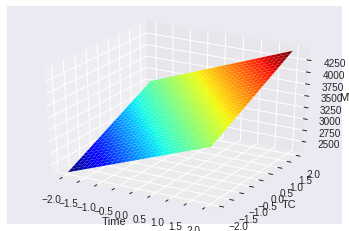

In [0]:
def f(Time, TC):
    return 3386.1538+290.0481*Time+250.7966*TC

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MW');

In [0]:
def MW_calc(Time, TC):
    return 3386.1538+290.0481*Time+250.7966*TC
def MI_calc(Time, TC):
    return 69.5222-13.1952*TC**2
def Y_calc(Time, TC):
    return 79.9400+1.4070*Time+0.7285*TC-2.7521*Time**2-2.0021*TC**2
def Desirability(y,U,T,L): #função desejabilidade (variável dependente) D=(d1 x d2 x d3)^1/3
    if y<L:
        d=0
    if (y>=L)&(y<=T):
        d=(y-L)/(T-L)
    if (y>=T)&(y<+U):
        d=(U-y)/(U-T)
    if (y>U):
        d=0
    return d

In [0]:
def function(x): #vetor que entra (tempo e temperatura)
    Time=x[0]
    TC=x[1]
    MW=MW_calc(Time, TC)
    MI=MI_calc(Time, TC)
    Y=Y_calc(Time, TC)
    U=3890
    T=3400
    L=2940
    d1=Desirability(MW,U,T,L)
    U=68
    T=65
    L=62
    d2=Desirability(MI,U,T,L)
    U=80
    T=77.5
    L=75.6
    d3=Desirability(Y,U,T,L)
    fun = (-1)*(d1*d2*d3)**(1/3) #multiplica por -1 para maximizar 
    return fun

In [0]:
bounds = [(-2, 2),(-2, 2)]
ret = optimize.differential_evolution(function, bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=200, popsize=40,recombination=0.5)

In [0]:
print("global minimum: x = ",ret.x, "f(x0) = ",ret.fun)

global minimum: x =  [-0.67043551  0.58541911] f(x0) =  -0.9532996697904043


In [0]:
strings=['Time','TC']
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
xcalc=[]
xcalc=Original(DAT,ret.x,strings).copy()
print("global minimum: x = ",xcalc, "f(x0) = ",ret.fun)

global minimum: x =  [ 80.26002092 179.13891307] f(x0) =  -0.9532996697904043


In [0]:
#Time-->ret.x[0]
#TC-->ret.x[1]
print(ret.x)
strings=['Time','TC']

#MW= MW_calc(ret.x[0], ret.x[1])
MW= MW_calc(0.99564898, -0.58543417)
#MI= MI_calc(ret.x[0], ret.x[1])
MI= MI_calc(0.99564898, -0.58543417)
#Y= Y_calc(ret.x[0], ret.x[1])
Y= Y_calc(0.99564898, -0.58543417)
print('Y=',Y,'MW=',MW,'MI=',MI)

[ 80.26002092 179.13891307]
Y= 77.50000003080302 MW= 3528.114995556116 MI= 64.99976730947617


In [0]:
print(ret.x[0])
print(ret.x)

80.26002092053125
[ 80.26002092 179.13891307]


PS: no planejamento de experimentos utilizando o Statistica -e-papers
Y=80
MI=65,044
MW=3586,1

tempo=86,65 e Temperatura=178,77